# ROMY Events - Plots

In [1]:
import os
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

### Configurations

In [3]:
config = {}

# path to data
config['path_to_data'] = data_path+"romy_events/data/"

config['path_to_figs'] = data_path+"romy_events/figures/"

# specify event file
config['eventfile'] = "ROMYevents_2020_2023_status.csv"

# specify catalog
config['catalogfile'] = "catalogs/ROMY_global_catalog_20200101_20231231.pkl"

# ROMY coordinates
config['sta_lon'] = 11.275501
config['sta_lat'] = 48.162941


### Load Catalog

In [4]:
cat = pd.read_pickle(config['path_to_data']+config['catalogfile'])

# add row with UTC times
cat['time_utc'] = [str(obs.UTCDateTime(str(_e).split('.')[0], precision=0)) for _e in cat.timestamp]

cat['depth_km'] = cat.depth / 1000

In [5]:
cat

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,depth_km
0,2020-01-06 10:32:19.160,17.7486,-66.8286,8079.8,5.95,mb,0.000000e+00,273.611213,7683.547502,2020-01-06T10:32:19Z,8.0798
1,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,20.3882
2,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,7.9220
3,2020-01-09 08:38:08.890,62.2654,171.0078,8959.8,5.97,mb,2.523497e+05,9.987013,7629.287864,2020-01-09T08:38:08Z,8.9598
4,2020-01-19 13:27:57.850,39.7669,77.1324,10361.2,5.78,mb,1.133739e+06,74.622163,5202.291787,2020-01-19T13:27:57Z,10.3612
...,...,...,...,...,...,...,...,...,...,...,...
1100,2023-12-20 12:11:22.030,-16.0280,-72.5450,94900.0,6.00,M,1.247675e+08,254.883009,10872.229523,2023-12-20T12:11:22Z,94.9000
1101,2023-12-23 17:48:05.220,52.0190,159.0030,36100.0,5.98,M,1.250469e+08,19.778726,8487.701245,2023-12-23T17:48:05Z,36.1000
1102,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,45.9000
1103,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,38.0000


### Load Event Data

In [6]:
# load data base
events = pd.read_csv(config['path_to_data']+config['eventfile'], header=0, skiprows=4)

# prepare dataframe
events.dropna(subset="Event", inplace=True)
events.sort_values(by="# Event")
events.reset_index(drop=True, inplace=True)

# add row with UTC times
events['time_utc'] = [str(obs.UTCDateTime(f"{_e.split('_')[1]}T{_e.split('_')[2]}", precision=0)) for _e in events.Event]

events

,# Event,Event,FUR,RLAS,ROMY-Z,ROMY-U,ROMY-V,ROMY-W,FURQ,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,0.0,000_20200107_060519_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png
2,1.0,001_20200107_082425_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png
3,2.0,002_20200119_165820_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png
4,3.0,003_20200120_065138_filtered.png,True,False,False,False,False,False,False,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png
5,4.0,004_20200124_175515_filtered.png,True,True,True,True,False,False,False,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,423.0,423_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png
425,424.0,424_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png
426,425.0,425_20231228_091518_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png
427,426.0,426_20231228_093727_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png


,# Event,Event,FUR,RLAS,ROMY-Z,ROMY-U,ROMY-V,ROMY-W,FURQ,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,time_utc
0,0.0,000_20200107_060519_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png,2020-01-07T06:05:19Z
1,1.0,001_20200107_082425_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png,2020-01-07T08:24:25Z
2,2.0,002_20200119_165820_filtered.png,True,True,False,False,False,False,False,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png,2020-01-19T16:58:20Z
3,3.0,003_20200120_065138_filtered.png,True,False,False,False,False,False,False,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png,2020-01-20T06:51:38Z
4,4.0,004_20200124_175515_filtered.png,True,True,True,True,False,False,False,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png,2020-01-24T17:55:15Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423.0,423_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
424,424.0,424_20231211_063331_filtered.png,False,False,False,False,False,False,False,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png,2023-12-11T06:33:31Z
425,425.0,425_20231228_091518_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png,2023-12-28T09:15:18Z
426,426.0,426_20231228_093727_filtered.png,True,True,True,True,True,False,False,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png,2023-12-28T09:37:27Z


### Merge Dataframes

In [7]:
df = pd.merge(left=cat, right=events, on="time_utc")

In [8]:
df

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2020-01-07 06:05:19.680,2.3273,96.4130,20388.2,6.02,mb,7.038052e+04,91.926528,9456.374129,2020-01-07T06:05:19Z,...,False,False,False,False,False,NaN,0.0,20200107.0,60519.0,filtered.png
1,2020-01-07 08:24:25.120,17.8096,-66.7908,7922.0,6.27,mb,7.872596e+04,273.629169,7675.920763,2020-01-07T08:24:25Z,...,False,False,False,False,False,NaN,1.0,20200107.0,82425.0,filtered.png
2,2020-01-19 16:58:20.270,-0.0922,123.7908,134364.4,6.04,mb,1.146361e+06,72.743117,11667.078041,2020-01-19T16:58:20Z,...,False,False,False,False,False,NaN,2.0,20200119.0,165820.0,filtered.png
3,2020-01-20 06:51:38.360,-59.3480,-26.3762,103227.9,6.28,mb,1.196359e+06,199.669607,12400.384022,2020-01-20T06:51:38Z,...,False,False,False,False,False,NaN,3.0,20200120.0,65138.0,filtered.png
4,2020-01-24 17:55:15.540,38.2987,39.1475,12303.2,6.15,mb,1.581776e+06,105.672138,2496.661360,2020-01-24T17:55:15Z,...,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,423.0,20231211.0,63331.0,filtered.png
436,2023-12-11 06:33:31.900,-18.9340,-175.5060,245000.0,6.20,M,1.239697e+08,12.888509,16704.989259,2023-12-11T06:33:31Z,...,False,False,False,False,False,NaN,424.0,20231211.0,63331.0,filtered.png
437,2023-12-28 09:15:18.470,44.5560,148.9440,45900.0,6.50,M,1.254482e+08,29.127618,8935.182118,2023-12-28T09:15:18Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",425.0,20231228.0,91518.0,filtered.png
438,2023-12-28 09:37:27.210,44.4540,149.1610,38000.0,6.36,M,1.254495e+08,29.034678,8953.123325,2023-12-28T09:37:27Z,...,False,True,True,True,False,"Z interrupted at start, U interrupted, V inte...",426.0,20231228.0,93727.0,filtered.png


In [9]:
df.keys()

Index(['timestamp', 'latitude', 'longitude', 'depth', 'magnitude', 'type',
       'seconds', 'backazimuth', 'distances_km', 'time_utc', 'depth_km',
       '# Event', 'Event', 'FUR', 'RLAS', 'ROMY-Z', 'ROMY-U', 'ROMY-V',
       'ROMY-W', 'FURQ', 'RLASQ', 'ZQ', 'UQ', 'VQ', 'WQ', 'Comment',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

### Select events with RLAS and ROMY-Z

In [10]:
select_z_idx = list(np.where((df.RLAS == True) & (df['ROMY-Z'] == True) & (df.ZQ == False))[0])

select_z = df[df.index.isin(select_z_idx)]

In [11]:
select_z

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
4,2020-01-24 17:55:15.540,38.2987,39.1475,12303.2,6.15,mb,1.581776e+06,105.672138,2496.661360,2020-01-24T17:55:15Z,...,False,False,True,False,False,Z coda incomplete,4.0,20200124.0,175515.0,filtered.png
14,2020-05-02 12:51:05.870,34.1862,25.7680,13468.2,6.43,mb,1.011713e+07,136.885653,1964.844686,2020-05-02T12:51:05Z,...,False,False,False,False,False,NaN,14.0,20200502.0,125105.0,filtered.png
28,2020-07-22 20:07:18.730,33.0824,86.8385,10000.0,6.20,mb,1.714170e+07,75.534793,6341.853307,2020-07-22T20:07:18Z,...,False,False,False,False,False,NaN,28.0,20200722.0,200718.0,filtered.png
36,2020-09-01 04:09:28.400,-27.9890,-71.1737,16693.5,6.40,mb,2.062663e+07,245.646435,11748.735840,2020-09-01T04:09:28Z,...,False,False,False,False,False,NaN,36.0,20200901.0,40928.0,filtered.png
38,2020-09-06 06:51:18.630,7.6300,-37.2557,11851.5,6.18,mb,2.106834e+07,241.810156,6394.083290,2020-09-06T06:51:18Z,...,False,False,False,False,False,NaN,38.0,20200906.0,65118.0,filtered.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2023-10-31 12:33:45.010,-28.7230,-71.3850,38700.0,6.70,M,1.204489e+08,245.260571,11821.894915,2023-10-31T12:33:45Z,...,False,False,False,False,False,NaN,405.0,20231031.0,123345.0,filtered.png
421,2023-12-02 15:00:09.380,8.6830,126.8850,38400.0,6.63,M,1.232225e+08,64.694732,11123.408162,2023-12-02T15:00:09Z,...,False,False,False,False,False,NaN,411.0,20231202.0,150009.0,filtered.png
422,2023-12-02 15:06:47.330,8.4440,126.9490,40000.0,7.40,M,1.232229e+08,64.791279,11148.636359,2023-12-02T15:06:47Z,...,False,False,False,False,False,NaN,412.0,20231202.0,150647.0,filtered.png
423,2023-12-02 15:31:28.240,8.5890,126.8690,40000.0,6.89,M,1.232243e+08,64.765433,11130.560323,2023-12-02T15:31:28Z,...,False,False,False,False,False,NaN,413.0,20231202.0,153128.0,filtered.png


In [12]:
def __makeplot_mag_hdist(data1):

    import matplotlib


    # vmin, vmax = min([min(max_rot1), min(max_rot2), min(max_rot3)]), max([max(max_rot1), max(max_rot2), max(max_rot3)])
    vmin, vmax = 1, 100

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))

    font = 14

    cmap = plt.get_cmap("viridis", 10)

    cax = ax.scatter(data1.distances_km, data1.magnitude, s=40, marker="o",
                     c=data1.depth_km, cmap=cmap, zorder=2,
                     label=f"Events M>6 (N={len(data1)})",
                     vmin=vmin, vmax=vmax, edgecolors="black")


    ax.grid(ls="--", color="grey", alpha=0.6, zorder=0, which="both")
    ax.legend(loc=2, fontsize=font-1)

    ax.set_ylabel("Magnitude", fontsize=font)
    ax.set_xlabel("Hypocentral Distance (km)", fontsize=font)

    ax.set_xscale("log")
    # ax.set_xlim(left=7)

    cbar = plt.colorbar(cax, pad=0.02)
    # cbar.set_label(r"log$_{10}$(max. rotation rate) (rad/s)", fontsize=font)
    cbar.set_label(r"Depth (km)", fontsize=font)

    ax.set_xticks([1500, 2000, 3000, 4000, 5000, 20000])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.show()
    return fig

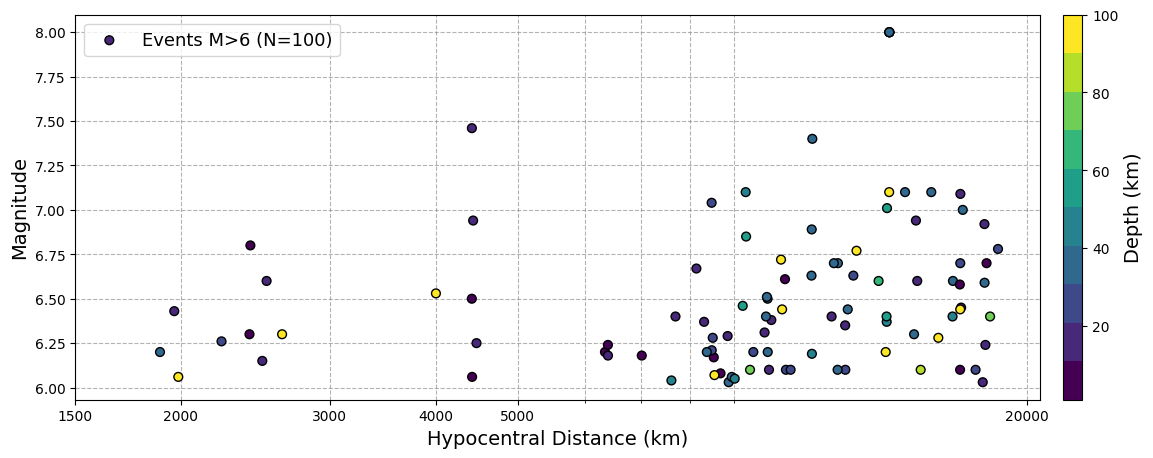

In [13]:
fig = __makeplot_mag_hdist(select_z);

fig.savefig(config['path_to_figs']+"RomyEvents_Mag_Dist_Z.png", format="png", dpi=150, bbox_inches='tight')


In [14]:
def __polar_plot(data1):

    r1 = data1.distances_km

    theta1 = np.radians(data1.backazimuth)


    import matplotlib
    cmap = matplotlib.colors.ListedColormap(["tab:red", "tab:orange", "tab:green"])


    data1.sort_values(by="magnitude")

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)

    # ax.scatter(theta1, r1, s=2**data1.magnitude, c=data1.depth_km, cmap=cmap, zorder=2, edgecolors="k", alpha=0.7)
    ax.scatter(theta1, r1, s=2**data1.magnitude, zorder=2, edgecolors="k", alpha=0.7)

    # station location
    ax.scatter(0, 0, zorder=3, s=100, marker='^', c="r", lw=0.8, edgecolors="k")

    # specify maximum radial value
#     ax.set_rmax(2)

#     ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_rlabel_position(-42.5)  # Move radial labels away from plotted line
    ax.grid(True, zorder=0)

    ax.set_title("", va='bottom')
    plt.show()
    return fig

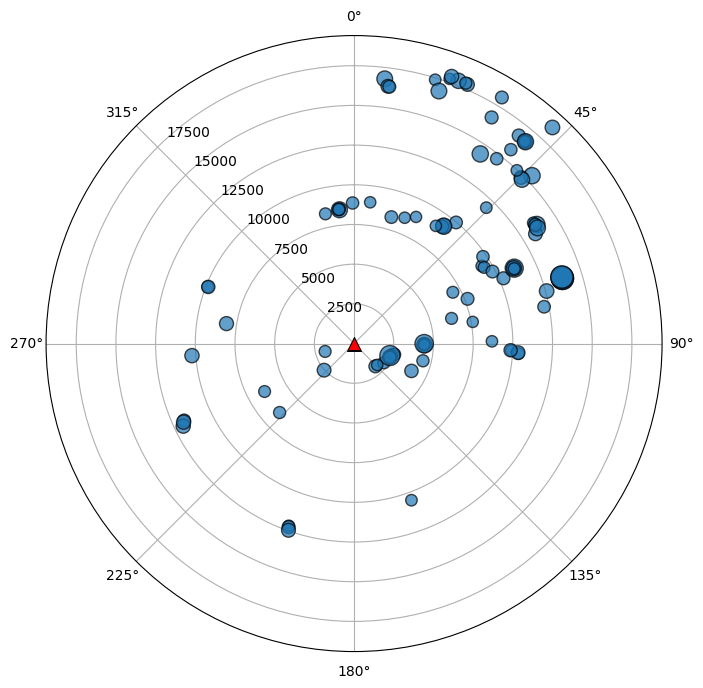

In [15]:
__polar_plot(select_z);

coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (0/4.66093e-310) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 191.276 degrees.


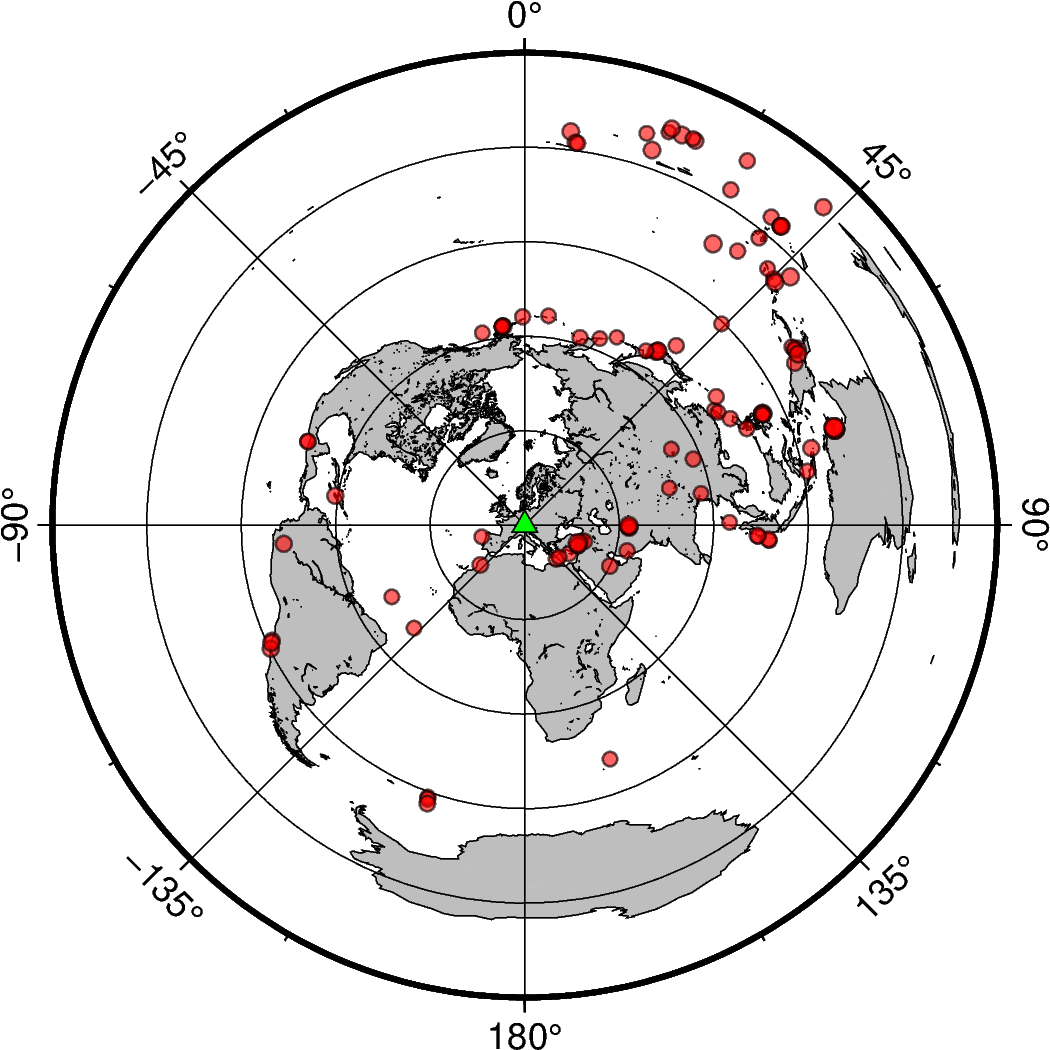

In [72]:
def __makeplot_polarmap(config, data1):

    import pygmt

    reg = [-170, 170, -80, 80]

    scale = "8c"

    proj = f"E{config['sta_lon']}/{config['sta_lat']}/180/{scale}"

    resolution = "03s"

    ## __________________________________________

    fig = pygmt.Figure()

    fig.coast(projection=proj, region=reg, land="grey")

    fig.coast(shorelines=True, frame=True)

    fig.basemap(
                region=[0, 360, 0, 10],
                projection=f"P{scale}+a",
                frame=["xa45fg45", "yg2", "+t"],
    )


    # make color pallets
#     cmap = pygmt.makecpt(cmap='etopo1', series='-7999/5000/1000', continuous=True)

#     ## define etopo data file
#     topo_data = pygmt.datasets.load_earth_relief(resolution=resolution, region=reg)


#     ##plot high res topography
#     fig.grdimage(
#         grid=topo_data,
#         region=reg,
#         projection=proj,
#         shading=True,
#         cmap = cmap,
#         frame=True,
#         nan_transparent=True
#     )

#     wet = topo_data * pygmt.grdlandmask(region=reg,  spacing=resolution, maskvalues=[1, "NaN"], resolution="f")

#     fig.grdimage(
#         grid=wet,
#         region=reg,
#         projection=proj,
#         shading=True,
#         cmap='seafloor',
#         frame=True,
#         nan_transparent=True
#     )

#     fig.coast(shorelines=True, borders="1/0.4p,black,solid", frame=False)

#     ## colorbar colormap
#     # cmap = pygmt.makecpt(cmap="viridis", series=[data1.magnitude.min(), data1.magnitude.max()])
#     # cmap = pygmt.makecpt(cmap="viridis", series=[data1.seconds.min(), data1.seconds.max()])
#     cmap = pygmt.makecpt(cmap="viridis", series=[data1.depth.min()/1000, data1.depth.max()/1000])

#     ## add fault lines
#     for n in range(faults.shape[0]):
#         try:
#             xx, yy = faults.geometry[n].coords.xy
#             fig.plot(x=xx,y=yy,pen="0.5p,red")
#         except:
#             print(n)


#     ## plot data coordinates
#     # data2.sort_values("magnitude", ascending=False)

#     # fig.plot(
#     #     x=data2.longitude,
#     #     y=data2.latitude,
#     #     size=0.04*2**data2.magnitude,
#     #     fill='grey',
#     #     style="cc",
#     #     pen="0p,black",
#     # )

#     data1.sort_values("magnitude", ascending=False)
    # cmap = pygmt.makecpt(cmap="viridis", series=[data1.magnitude.round(0).min(), data1.magnitude.round(0).max()])
    # cmap = pygmt.makecpt(cmap="viridis")

    fig.plot(
            region=reg, projection=proj,
            x=data1.longitude,
            y=data1.latitude,
            # fill=0.02*data1.magnitude,
            size=0.02*data1.magnitude,
            fill='red',
            # cmap=cmap,
            style="cc",
            pen="0.5p,black",
            transparency=40,
    )

    ## plot PFO
    fig.plot(
        region=reg, projection=proj,
        x=config['sta_lon'],
        y=config['sta_lat'],
        size=np.array([0.3]),
        fill="green",
        style="t0.25c",
        pen="black",
    )

    # fig.text(
    #     region=reg, projection=proj,
    #     text="ROMY",
    #     x=config['sta_lon']-50,
    #     y=config['sta_lat']-20,
    #     offset=[0.35],
    #     font="7p,Helvetica-Bold,darkgreen"
    # )


    fig.show()
    return fig

fig = __makeplot_polarmap(config, select_z);

fig.savefig(config['path_to_figs']+"RomyEvents_map_Z.png", dpi=150)


(6.0, 8.0)

### Select events with all ROMY

In [17]:
c1 = (df['ROMY-Z'] == True)
c2 = (df['ROMY-U'] == True)
c3 = (df['ROMY-V'] == True)
c4 = (df.ZQ == False)
c5 = (df.UQ == False)
c6 = (df.VQ == False)

select_zuv_idx = list(np.where(c1 & c2 & c3 & c4 & c5 & c6)[0])

select_zuv = df[df.index.isin(select_zuv_idx)]

In [18]:
select_zuv

,timestamp,latitude,longitude,depth,magnitude,type,seconds,backazimuth,distances_km,time_utc,...,RLASQ,ZQ,UQ,VQ,WQ,Comment,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
392,2023-09-06 23:48:04.630,-30.2737,-71.4817,36000.0,6.70,mb,1.157373e+08,244.200800,11952.190026,2023-09-06T23:48:04Z,...,False,False,False,False,False,NaN,382.0,20230906.0,234804.0,filtered.png
394,2023-09-08 22:11:01.400,31.0580,-8.3847,19000.0,6.60,mb,1.159043e+08,228.396892,2526.012038,2023-09-08T22:11:01Z,...,False,False,False,False,False,NaN,384.0,20230908.0,221101.0,filtered.png
397,2023-09-13 11:49:18.000,-36.2000,-97.8000,10000.0,6.20,Mwp,1.162990e+08,255.675947,14224.090137,2023-09-13T11:49:18Z,...,False,False,False,False,False,"Z distorted, U distorted, V distorted",387.0,20230913.0,114918.0,filtered.png
421,2023-12-02 15:00:09.380,8.6830,126.8850,38400.0,6.63,M,1.232225e+08,64.694732,11123.408162,2023-12-02T15:00:09Z,...,False,False,False,False,False,NaN,411.0,20231202.0,150009.0,filtered.png
422,2023-12-02 15:06:47.330,8.4440,126.9490,40000.0,7.40,M,1.232229e+08,64.791279,11148.636359,2023-12-02T15:06:47Z,...,False,False,False,False,False,NaN,412.0,20231202.0,150647.0,filtered.png
423,2023-12-02 15:31:28.240,8.5890,126.8690,40000.0,6.89,M,1.232243e+08,64.765433,11130.560323,2023-12-02T15:31:28Z,...,False,False,False,False,False,NaN,413.0,20231202.0,153128.0,filtered.png
424,2023-12-02 16:03:42.970,8.4430,126.7580,42700.0,6.19,M,1.232263e+08,64.943815,11135.860505,2023-12-02T16:03:42Z,...,False,False,False,False,False,NaN,414.0,20231202.0,160342.0,filtered.png


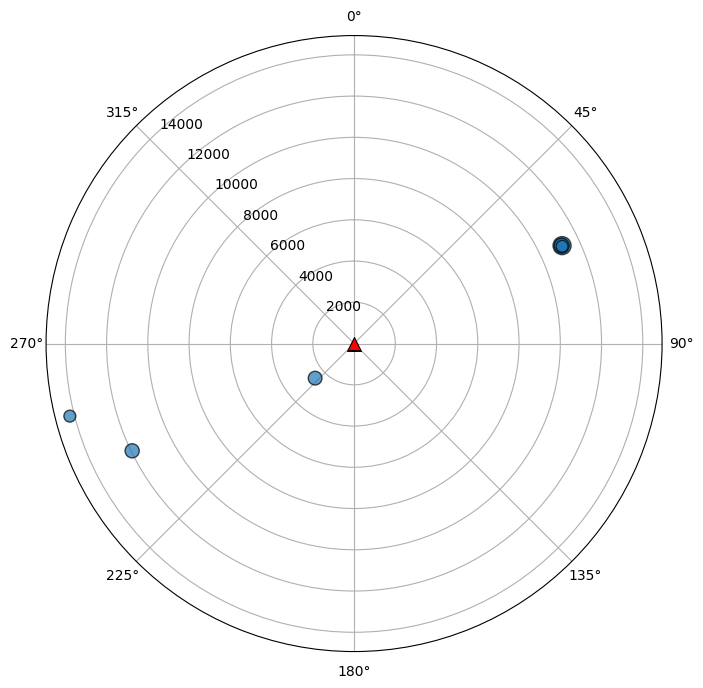

In [19]:
__polar_plot(select_zuv);

In [20]:
8

8